# $\mathrm{GLYOX}$ (Glyoxal)

In [1]:
using Pkg 
Pkg.activate("../")

  Activating project at `~/gitrepos/activepure/Photolysis.jl/mcm`


In [2]:
using Plots, MLPlotRecipes
using HDF5
using Tables, DataFrames, CSV
using MLJ, MLJGaussianProcesses
using StatsBase 
using KernelFunctions
using ParameterHandling

In [3]:
include("./utils.jl")

filter_outliers (generic function with 1 method)

In [4]:
# load in spectrometer data
hr4000_df = CSV.File("../hr4000_wavelengths.txt") |> DataFrame ; 

In [5]:
data = [
225	0.56	0.241	0.199	1
230	0.535	0.246	0.219	1
235	0.504	0.251	0.245	1
240	0.475	0.256	0.269	1
245	0.448	0.261	0.291	1
250	0.42	0.266	0.314	1
255	0.395	0.271	0.334	1
260	0.37	0.278	0.352	1
265	0.345	0.286	0.369	1
270	0.32	0.293	0.387	1
275	0.295	0.301	0.404	1
280	0.27	0.31	0.42	1
285	0.25	0.32	0.43	1
290	0.23	0.33	0.44	1
295	0.206	0.343	0.451	1
300	0.186	0.357	0.457	1
305	0.166	0.374	0.46	1
310	0.146	0.396	0.458	1
315	0.125	0.423	0.452	1
320	0.11	0.457	0.433	1
325	0.095	0.497	0.408	1
330	0.08	0.541	0.379	1
335	0.065	0.593	0.337	0.995
340	0.051	0.648	0.279	0.978
345	0.036	0.616	0.204	0.856
350	0.021	0.52	0.15	0.691
355	0.008	0.424	0.108	0.54
360	0	0.332	0.072	0.404
365	0	0.253	0.04	0.293
370	0	0.191	0.022	0.213
375	0	0.142	0.014	0.156
380	0	0.104	0.011	0.115
385	0	0.077	0.008	0.085
390	0	0.057	0.007	0.064
395	0	0.043	0.005	0.048
400	0	0.033	0.004	0.037
405	0	0.026	0.003	0.029
410	0	0.02	0.002	0.022
415	0	0.016	0.001	0.017
420	0	0.013	0	0.013
425	0	0.01	0	0.01
430	0	0.008	0	0.008
435	0	0.006	0	0.006
440	0	0.003	0	0.003
445	0	0.001	0	0.001
450	0	0	0	0
455	0	0	0	0
460	0	0	0	0    
]

λ = data[:,1]
Φ₁ = data[:,2]
Φ₂ = data[:,3]
Φ₃ = data[:,4]

48-element Vector{Float64}:
 0.199
 0.219
 0.245
 0.269
 0.291
 0.314
 0.334
 0.352
 0.369
 0.387
 0.404
 0.42
 0.43
 ⋮
 0.003
 0.002
 0.001
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

# Model Evaluation

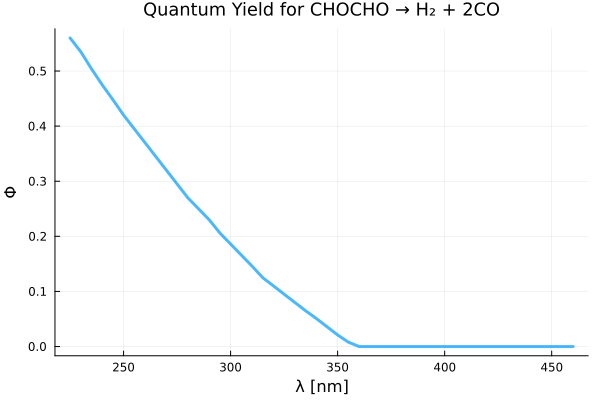

In [6]:
p = plot(
    λ,
    Φ₁,
    xlabel="λ [nm]",
    ylabel="Φ",
    alpha=0.7,
    lw=3,
    label="",
    title="Quantum Yield for CHOCHO → H₂ + 2CO",
    titlefontsize=12,
)

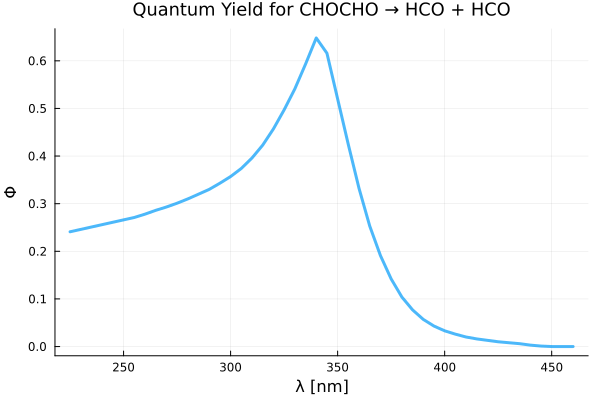

In [7]:
p = plot(
    λ,
    Φ₂,
    xlabel="λ [nm]",
    ylabel="Φ",
    alpha=0.7,
    lw=3,
    label="",
    title="Quantum Yield for CHOCHO → HCO + HCO",
    titlefontsize=12,
)

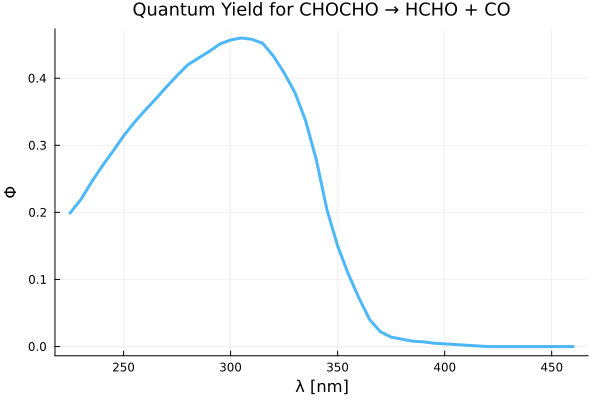

In [8]:
p = plot(
    λ,
    Φ₃,
    xlabel="λ [nm]",
    ylabel="Φ",
    alpha=0.7,
    lw=3,
    label="",
    title="Quantum Yield for CHOCHO → HCHO + CO",
    titlefontsize=12,
)